In [42]:
import pandas as pd
import emoji 
import codecs

df = pd.read_csv("proc_tweets.csv.gz",low_memory=False, nrows=500000, usecols=["TIME POSTED","TWITTER'S TIME POSTED","RETWEET"], compression='gzip')

df["emoji"] = df["RETWEET"].apply(lambda x: [i for i in str(x).split() if i in emoji.UNICODE_EMOJI])



In [43]:
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def senti_data(filename_pos, filename_neg):
    '''
    Converts a list of positive and negative words into a lists.
    Output: pos: List of all positive words
            neg: List of all negative words
    '''
    positive_vocab = ''
    negative_vocab = ''

    with open(filename_pos, 'r') as f:
        for line in f:
            positive_vocab += line.strip() + ' '

    with open(filename_neg, 'r') as f:
        for line in f:
            negative_vocab += line.strip() + ' '
    pos = []
    neg = []
    pos.append(positive_vocab)
    neg.append(negative_vocab)
    return pos, neg


#Creating Vectorizer and transforming data
cv = TfidfVectorizer(ngram_range=(1,3), stop_words='english', strip_accents='unicode')
tf = cv.fit_transform(df['RETWEET'].apply(lambda x: np.str_(x)))

#Getting positive and negative words list
pos, neg = senti_data('data/pos.txt','data/neg.txt')

#Converting the words list to vectors
pos_vec = cv.transform(pos)
neg_vec = cv.transform(neg)

#Calculating similarity between each tweet and the positive vector
pos_score = np.asanyarray(cosine_similarity(tf,pos_vec))
neg_score = np.asanyarray(cosine_similarity(tf,neg_vec))

#Calculating net score, assuming that each tweet would have a positive and negative score associated with it. And the net difference would give me the net orientation of the tweet.
score = pos_score - neg_score

# #Getting the top 20 tweets with a positive sentiment
# top_tweets = np.argsort(score.ravel())[-20:][::-1]
# for index, top_tweet in enumerate(top_tweets):
#     print(df.RETWEET[top_tweet],score.ravel()[top_tweet] )

df["score"] = score




In [44]:
df.head()

,TIME POSTED,TWITTER'S TIME POSTED,RETWEET,emoji,score
0,"October 13, 2020 21:08:51",2020-10-13 21:08:45,happening tooooo long it's worse fellow Afric...,[],-0.005328
1,"October 13, 2020 21:08:51",2020-10-13 21:08:45,It's minute 😭 https//tco/1UKEk20mcX,[😭],0.000000
2,"October 13, 2020 21:08:51",2020-10-13 21:08:45,Nigerian youths (Male Female) appreciation tw...,[❤️],0.000944
3,"October 13, 2020 21:08:51",2020-10-13 21:08:45,"white person say ""what"" sharp hearing correct...",[😅],0.009838
4,"October 13, 2020 21:08:51",2020-10-13 21:08:45,support #DOTYouth Catherine Kamau incredible ...,[],0.006059


In [ ]:
tracked_emoticons = df["emoji"].explode().unique()[1:40]

for emoticon in tracked_emoticons:
    df[emoticon]=0
    
for index, row in df.iterrows():
    
    for emoji in row["emoji"]:
        if emoji in tracked_emoticons:
            df.loc[index, emoji] = row["score"]

        
        

In [ ]:
df.columns

In [ ]:
# df[["TWITTER'S TIME POSTED",
#        '😭', '❤️', '😅', '💪', '😁', '🇺🇦', '👏', '🙄', '🥵', '🔥', '🌶', '😂', '👍', '🙏',
#        '😘', '😍', '🤣', '😉', '🔴', '🤔', '💕', '☺️', '©', '🎉', '😊', '🤩', '💫', '😻',
#        '💙', '🍑', '🇵🇹', '💖', '♥️', '🙏🏽', '💯', '😆', '👀', '😜', '😏']].sort_values(by="TWITTER'S TIME POSTED").cumsum().plot(figsize=(50,20), fontproperties="prop")


In [ ]:
import matplotlib.pyplot as plt

df["TWITTER'S TIME POSTED"] = pd.to_datetime(df["TWITTER'S TIME POSTED"], format='%Y-%m-%d %H:%M:%S')
df.set_index(["TWITTER'S TIME POSTED"],inplace=True)



In [ ]:
df

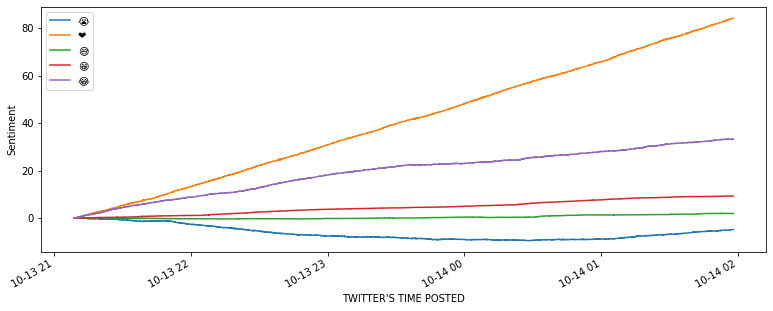

In [51]:


ax = df[[
       '😭', '❤️', '😅', '😁', '😂']].cumsum().plot(figsize=(13,5),ylabel="Sentiment")

plt.show()
